#UTS INDIVIDU

Muhammad Reza Gilang Pratama (2411502129)

Kelompok AE

In [1]:
# Install Library
!pip install tweepy
!pip install pandas
!pip install scikit-learn
!pip install transformers torch

In [7]:
# ===============================
# Mengambil Data dari Sosial Media X
# ===============================
import tweepy
import pandas as pd

BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAEdY5QEAAAAAqz2a5lFBV%2BBYilwZtGbjk6Zr5UI%3Duo2xCkxcfaFGBsPAwf1yRrIRiQcpP3AFDzDIZOjXVFwYF1QG3D"
client = tweepy.Client(BEARER_TOKEN)

keyword_1 = "petani"
keyword_2 = "import beras"
keyword_3 = "petani milenial"

query = f'({keyword_1} OR "{keyword_2}" OR "{keyword_3}") -is:retweet lang:id'
print(f"Mengambil tweet dengan query: {query}\n")

try:
    response = client.search_recent_tweets(
        query=query,
        tweet_fields=["created_at", "public_metrics"],
        max_results=100
    )

    tweets_list = []
    if response.data:
        for tweet in response.data:
            tweets_list.append({
                'ID': tweet.id,
                'Waktu': tweet.created_at,
                'Tweets': tweet.text,
                'Jumlah Retweet': tweet.public_metrics['retweet_count'],
                'Jumlah Suka': tweet.public_metrics['like_count']
            })

    df = pd.DataFrame(tweets_list)
    print("Data berhasil dikumpulkan:")
    display(df.head())

except Exception as e:
    print(f"Error saat mengambil data: {e}")

display(df)

Mengambil tweet dengan query: (petani OR "import beras" OR "petani milenial") -is:retweet lang:id

Error saat mengambil data: 429 Too Many Requests
Too Many Requests


,ID,Waktu,Tweets,Jumlah Retweet,Jumlah Suka,Cleaned,Sentiment
0,1988495639546917282,2025-11-12 06:34:39+00:00,Peningkatan kapasitas petani #ICARE Jawa Tenga...,0,1,peningkatan kapasitas petani jawa tengah terus...,Netral
1,1988494660697026696,2025-11-12 06:30:46+00:00,@Boediantar4 Mantan jendral yg sdh pikun ikut ...,0,0,mantan jendral yg sdh pikun ikut komentar yg b...,Negatif
2,1988493749299933399,2025-11-12 06:27:08+00:00,"Kalian tahu gak sih, buah mancang itu super se...",0,0,kalian tahu gak sih buah mancang itu super seh...,Positif
3,1988493176689283520,2025-11-12 06:24:52+00:00,@Aftertoasts Apakah beliau petani gag.,0,0,apakah beliau petani gag,Negatif
4,1988492444489650201,2025-11-12 06:21:57+00:00,@autad mas domisili mana petani jahe nya ini k...,0,0,mas domisili mana petani jahe nya ini kalo bol...,Netral
...,...,...,...,...,...,...,...
95,1988447524253036564,2025-11-12 03:23:28+00:00,"Dari petani lokal hingga nelayan kecil, semua ...",0,0,dari petani lokal hingga nelayan kecil semua i...,Positif
96,1988447487628353833,2025-11-12 03:23:19+00:00,@JJRizal swasembada beras/revolusi hijau ini j...,0,0,swasembada berasrevolusi hijau ini juga berdam...,Netral
97,1988447279305646238,2025-11-12 03:22:29+00:00,"MBG tuh bukan cuma soal ngabisin anggaran, cuy...",1,4,mbg tuh bukan cuma soal ngabisin anggaran cuyy...,Positif
98,1988447132991520870,2025-11-12 03:21:54+00:00,MBG juga bantu petani lokal karena bahan makan...,0,0,mbg juga bantu petani lokal karena bahan makan...,Positif


In [13]:
# ===============================
# Pre-Processing Data
# ===============================
import re
import string

def bersihkan_teks(teks):
    teks = teks.lower()
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks, flags=re.MULTILINE)
    teks = re.sub(r'\@\w+', '', teks)
    teks = re.sub(r'\#\w+', '', teks)
    teks = teks.translate(str.maketrans('', '', string.punctuation))
    teks = re.sub(r'\d+', '', teks)
    teks = ' '.join(teks.split())
    return teks

df['Cleaned'] = df['Tweets'].apply(bersihkan_teks)

print("Hasil Pre-processing (5 Tweet Pertama):")
display(df[['Tweets', 'Cleaned']].head(5))

Hasil Pre-processing (5 Tweet Pertama):


,Tweets,Cleaned
0,Peningkatan kapasitas petani #ICARE Jawa Tenga...,peningkatan kapasitas petani jawa tengah terus...
1,@Boediantar4 Mantan jendral yg sdh pikun ikut ...,mantan jendral yg sdh pikun ikut komentar yg b...
2,"Kalian tahu gak sih, buah mancang itu super se...",kalian tahu gak sih buah mancang itu super seh...
3,@Aftertoasts Apakah beliau petani gag.,apakah beliau petani gag
4,@autad mas domisili mana petani jahe nya ini k...,mas domisili mana petani jahe nya ini kalo bol...


In [14]:
# ===============================
# Feature Extraction
# ===============================
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned'])
feature_names = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print("Matriks Fitur TF-IDF (Hasil Ekstraksi):")
display(df_tfidf)

print("\nFitur yang Diekstrak (Skor TF-IDF) untuk 5 Tweet Pertama:")
for i in range(5):
    if i >= len(df):
        break
    print(f"\n--- Tweet {i+1} ---")
    print(f"Teks Asli: {df.iloc[i]['Cleaned']}")

    feature_scores = {'Fitur (Kata)': [], 'Skor TF-IDF': []}
    for col in df_tfidf.columns:
        score = df_tfidf.iloc[i][col]
        if score > 0:
            feature_scores['Fitur (Kata)'].append(col)
            feature_scores['Skor TF-IDF'].append(score)

    df_scores = pd.DataFrame(feature_scores)
    display(df_scores.sort_values(by='Skor TF-IDF', ascending=False))

Matriks Fitur TF-IDF (Hasil Ekstraksi):


,abai,abang,abd,ada,adalah,adek,adi,agik,agunan,ahahaha,...,workshop,wujud,wujudkan,ya,yaa,yaaa,yang,yg,zakia,zaman
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.193092,0.0,0.000000,0.285856,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.116291,0.000000,0.0,0.141503,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
96,0.0,0.0,0.0,0.13714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.091087,0.116994,0.0,0.0
97,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
98,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0



Fitur yang Diekstrak (Skor TF-IDF) untuk 5 Tweet Pertama:

--- Tweet 1 ---
Teks Asli: peningkatan kapasitas petani jawa tengah terus ditingkatkan selaku piu icare jawa tengah fasilitasi studi karya perbenihan padi kepada para petani dari lokasi icare di brebes semoga hal ini dpt mendorong terbentuknya desa mandiri benih di brebes


,Fitur (Kata),Skor TF-IDF
1,brebes,0.339592
9,icare,0.339592
27,tengah,0.339592
11,jawa,0.291768
6,dpt,0.169796
12,kapasitas,0.169796
13,karya,0.169796
23,piu,0.169796
25,semoga,0.169796
24,selaku,0.169796



--- Tweet 2 ---
Teks Asli: mantan jendral yg sdh pikun ikut komentar yg bkn ranahnya dah bosen jadi petani yaa sesama mantan napi harus saling membantu


,Fitur (Kata),Skor TF-IDF
8,mantan,0.449483
18,yg,0.285856
1,bosen,0.224741
16,sesama,0.224741
2,dah,0.224741
7,komentar,0.224741
6,jendral,0.224741
13,ranahnya,0.224741
14,saling,0.224741
12,pikun,0.224741



--- Tweet 3 ---
Teks Asli: kalian tahu gak sih buah mancang itu super sehat lho aku jual buah mancang fresh langsung dari petani lokal harga spesial buat kamu yang order sekarang cuma rp kg kamu bisa dapat buah mancang yang segar dan lezat pemesanan dm aku atau wa di ya 😊


,Fitur (Kata),Skor TF-IDF
3,buah,0.428676
23,mancang,0.428676
17,kamu,0.285784
0,aku,0.232582
10,dm,0.142892
16,kalian,0.142892
30,sekarang,0.142892
31,sih,0.142892
32,spesial,0.142892
35,wa,0.142892



--- Tweet 4 ---
Teks Asli: apakah beliau petani gag


,Fitur (Kata),Skor TF-IDF
0,apakah,0.617330
2,gag,0.566475
1,beliau,0.530393
3,petani,0.129205



--- Tweet 5 ---
Teks Asli: mas domisili mana petani jahe nya ini kalo boleh tau kebetulan lg cari supplier jahe


,Fitur (Kata),Skor TF-IDF
4,jahe,0.523133
0,boleh,0.261566
1,cari,0.261566
2,domisili,0.261566
7,lg,0.261566
6,kebetulan,0.261566
9,mas,0.261566
12,supplier,0.261566
8,mana,0.240019
10,nya,0.240019


In [9]:
# ===============================
# Analisis Sentimen Sederhana
# ===============================
from transformers import pipeline

MODEL_NAME = "w11wo/indonesian-roberta-base-sentiment-classifier"

print(f"Memuat pipeline dengan model ({MODEL_NAME})...")

try:
    sentiment_pipeline = pipeline(
        "sentiment-analysis",
        model=MODEL_NAME,
        tokenizer=MODEL_NAME
    )

    print("Model berhasil dimuat.")
    print("-" * 30)

    def get_sentiment_roberta(teks):
        try:
            if not teks.strip():
                return 'Netral'

            result = sentiment_pipeline(teks)
            label = result[0]['label']

            if label == 'positive':
                return 'Positif'
            elif label == 'negative':
                return 'Negatif'
            else:
                return 'Netral'

        except Exception as e:
            if "too long" in str(e):
                teks_terpotong = teks[:512]
                result = sentiment_pipeline(teks_terpotong)
                label = result[0]['label']

                if label == 'positive':
                    return 'Positif'
                elif label == 'negative':
                    return 'Negatif'
                else:
                    return 'Netral'

            print(f"Error processing text: {teks} - {e}")
            return "Gagal Proses"

    df['Sentiment'] = df['Cleaned'].apply(get_sentiment_roberta)

    print("\nHasil Analisis Sentimen (5 Tweet Pertama):")
    display(df[['Cleaned', 'Sentiment']].head(5))

    print("\nDistribusi Sentimen di Seluruh Data:")
    display(df['Sentiment'].value_counts())

except Exception as e:
    print(f"GAGAL MEMUAT MODEL. Error: {e}")
    print("Pastikan Anda memiliki koneksi internet untuk mengunduh model.")

Memuat pipeline dengan model (w11wo/indonesian-roberta-base-sentiment-classifier)...


Device set to use cpu


Model berhasil dimuat.
------------------------------

Hasil Analisis Sentimen (5 Tweet Pertama):


,Cleaned,Sentiment
0,peningkatan kapasitas petani jawa tengah terus...,Netral
1,mantan jendral yg sdh pikun ikut komentar yg b...,Negatif
2,kalian tahu gak sih buah mancang itu super seh...,Positif
3,apakah beliau petani gag,Negatif
4,mas domisili mana petani jahe nya ini kalo bol...,Netral



Distribusi Sentimen di Seluruh Data:


,count
Sentiment,
Netral,50
Negatif,25
Positif,25



--- Visualisasi Distribusi Sentimen ---

Visualisasi diagram lingkaran berwarna telah disimpan.


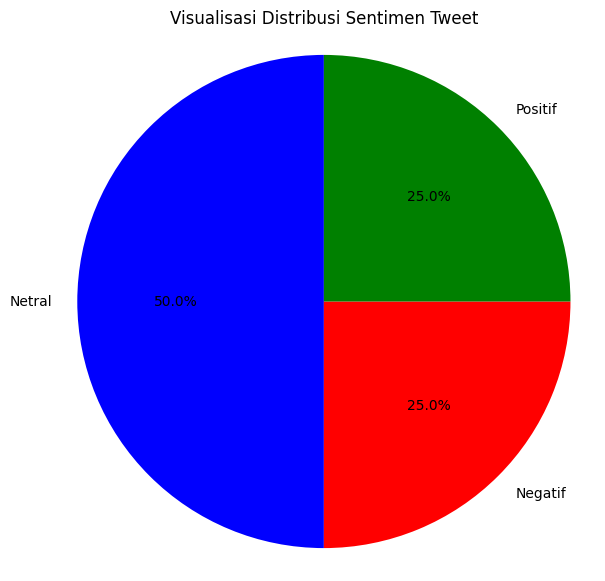

In [10]:
# ===============================
# Visualisasi (Pie Chart)
# ===============================
import matplotlib.pyplot as plt

print("\n--- Visualisasi Distribusi Sentimen ---")

sentiment_counts = df['Sentiment'].value_counts()
color_map = {'Positif': 'green', 'Netral': 'blue', 'Negatif': 'red'}
plot_colors = sentiment_counts.index.map(color_map).fillna('gray')

plt.figure(figsize=(7, 7))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plot_colors
)
plt.title('Visualisasi Distribusi Sentimen Tweet')
plt.axis('equal')
plt.savefig('distribusi_sentimen_pie.png')

print("\nVisualisasi diagram lingkaran berwarna telah disimpan.")


--- Visualisasi Distribusi Sentimen ---

Visualisasi diagram batang berwarna telah disimpan.


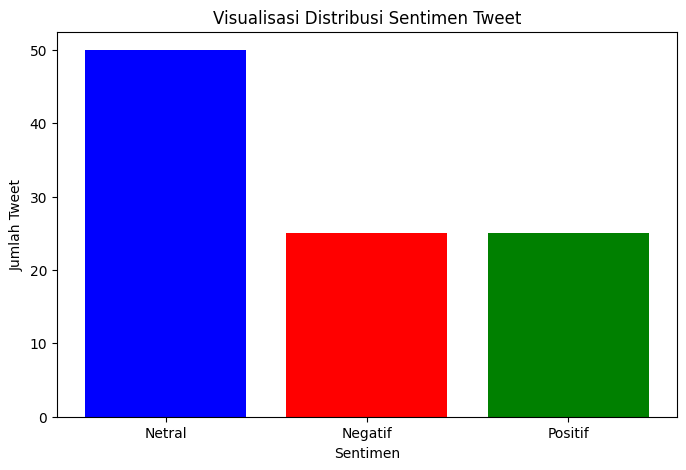

In [11]:
# ===============================
# Visualisasi (Bar Chart)
# ===============================
print("\n--- Visualisasi Distribusi Sentimen ---")

sentiment_counts = df['Sentiment'].value_counts()
plot_colors = sentiment_counts.index.map(color_map).fillna('gray')

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=plot_colors)
plt.title('Visualisasi Distribusi Sentimen Tweet')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.savefig('distribusi_sentimen_barchart.png')

print("\nVisualisasi diagram batang berwarna telah disimpan.")